In [1]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
series = read_csv('water.csv', header=0, index_col=0, parse_dates=True)

In [3]:
series

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
...,...
1959-01-01,594
1960-01-01,587
1961-01-01,587


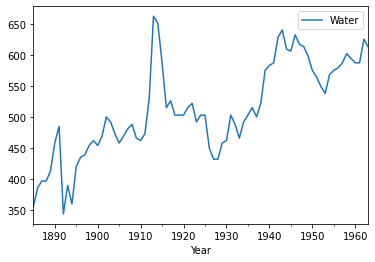

In [4]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Water'}>]], dtype=object)

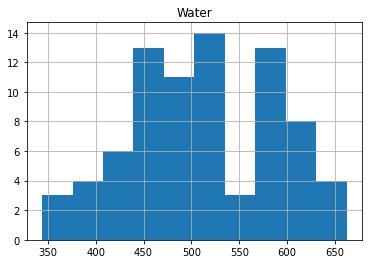

In [5]:
series.hist()

<AxesSubplot:ylabel='Density'>

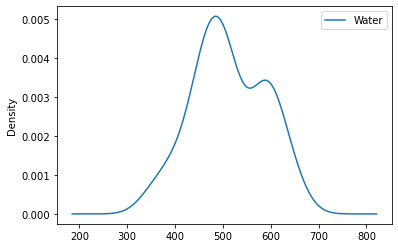

In [6]:
series.plot(kind='kde')

In [7]:
# separate out a validation dataset
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]


In [8]:
dataset.shape

(69, 1)

In [9]:
validation

,Water
Year,
1954-01-01,568
1955-01-01,575
1956-01-01,579
1957-01-01,587
1958-01-01,602
1959-01-01,594
1960-01-01,587
1961-01-01,587
1962-01-01,625


In [10]:
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 69, Validation 10


#### Persistence/ Base model

In [11]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)



In [12]:
train.shape

(69,)

In [13]:
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [14]:
test.shape

(35,)

In [15]:
list(train)

[356.0,
 386.0,
 397.0,
 397.0,
 413.0,
 458.0,
 485.0,
 344.0,
 390.0,
 360.0,
 420.0,
 435.0,
 439.0,
 454.0,
 462.0,
 454.0,
 469.0,
 500.0,
 492.0,
 473.0,
 458.0,
 469.0,
 481.0,
 488.0,
 466.0,
 462.0,
 473.0,
 530.0,
 662.0,
 651.0,
 587.0,
 515.0,
 526.0,
 503.0]

In [16]:
history = [x for x in train]
history

[356.0,
 386.0,
 397.0,
 397.0,
 413.0,
 458.0,
 485.0,
 344.0,
 390.0,
 360.0,
 420.0,
 435.0,
 439.0,
 454.0,
 462.0,
 454.0,
 469.0,
 500.0,
 492.0,
 473.0,
 458.0,
 469.0,
 481.0,
 488.0,
 466.0,
 462.0,
 473.0,
 530.0,
 662.0,
 651.0,
 587.0,
 515.0,
 526.0,
 503.0]

In [ ]:
test

#### ARIMA Hyperparameters

In [ ]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt



In [ ]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

#### Grid search for p,d,q values

In [ ]:
for i in range(1,4):
    for j in range(1,4):
        print(i,j)

In [ ]:
def info():
    

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

#### Build Model based on the optimized values

In [ ]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [ ]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [ ]:
# fit model
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()


In [ ]:
forecast=model_fit.forecast(steps=10)[0]
forecast

In [ ]:
model_fit.plot_predict(1, 79)

In [ ]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

In [ ]:
val

#### Combine train and test data and build final model

In [ ]:
# fit model
data = read_csv('water.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [ ]:
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()

In [ ]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,85)

In [ ]:
forecast